In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('../Dataset/titanic.csv')
titanic_df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


## Mean

In [3]:
titanic_df['age'].mean()

np.float64(29.69911764705882)

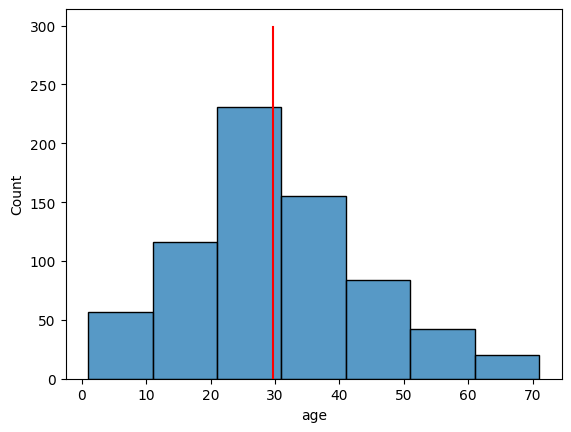

In [4]:
mn = np.mean(titanic_df['age'])
sns.histplot(x = 'age', data=titanic_df, bins=[i for i in range(1, 81, 10)])
plt.plot([mn for i in range(300)], [i for i in range(300)], c = 'red')


plt.show()

In [5]:
titanic_df.fillna({'age': titanic_df['age'].mean()}, inplace=True)

## Median

In [6]:
titanic_df['fare'].median()

np.float64(14.4542)

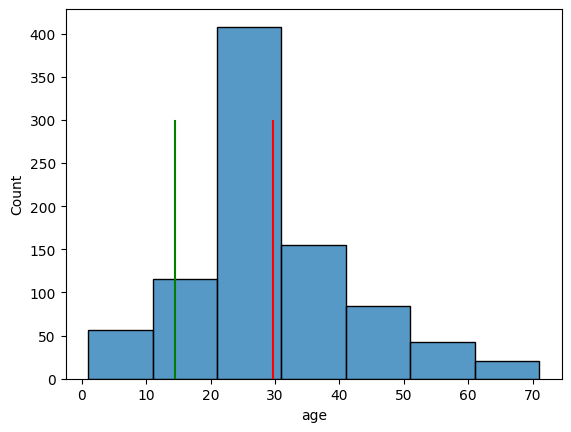

In [7]:
mn = np.mean(titanic_df['age'])
md = np.median(titanic_df['fare'])

sns.histplot(x = 'age', data=titanic_df, bins=[i for i in range(1, 81, 10)])
plt.plot([mn for i in range(300)], [i for i in range(300)], c = 'red')
plt.plot([md for i in range(300)], [i for i in range(300)], c = 'green')

plt.show()

## Mode

In [8]:
mo = titanic_df['fare'].mode()[0]

In [9]:
titanic_df['fare'].value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

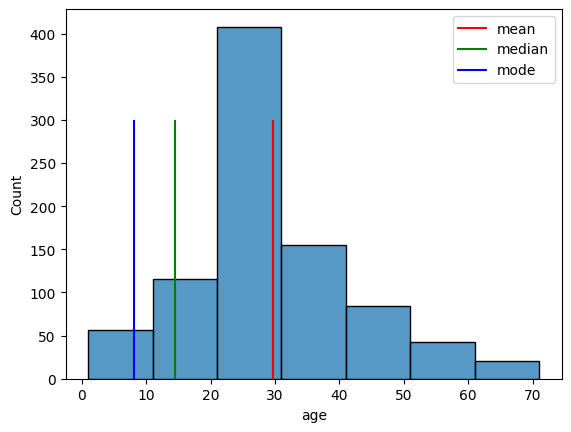

In [10]:
mn = np.mean(titanic_df['age'])
md = np.median(titanic_df['fare'])
mo = titanic_df['fare'].mode()[0]

sns.histplot(x = 'age', data=titanic_df, bins=[i for i in range(1, 81, 10)])
plt.plot([mn for i in range(300)], [i for i in range(300)], c = 'red', label='mean')
plt.plot([md for i in range(300)], [i for i in range(300)], c = 'green', label='median')
plt.plot([mo for i in range(300)], [i for i in range(300)], c = 'blue', label='mode')
plt.legend()

plt.show()

## Range

In [11]:
minimum = titanic_df['age'].min()
maximum = titanic_df['age'].max()

ranges = maximum - minimum
ranges

np.float64(79.58)

# Find Best Dataset

### Note: Whichever database has the lowest standard deviation, MAD, and variance will be the best for us, and we will use that database.

## 1. MAD (Mean Absolute Deviation)

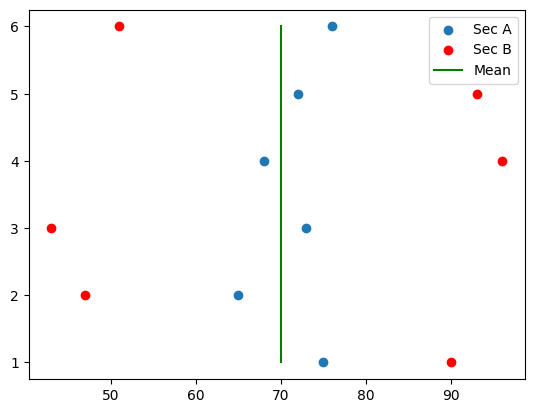

In [12]:
sec_a = np.array([75, 65, 73, 68, 72, 76])
sec_b = np.array([90, 47, 43, 96, 93, 51])
no = np.array([1, 2, 3, 4, 5, 6])
means = np.mean(sec_a) # Both of them mean are same

plt.scatter(x = sec_a, y = no, label='Sec A')
plt.scatter(x = sec_b, y = no, color = 'r', label='Sec B')
plt.plot([70, 70, 70, 70, 70, 70], no, color='green', label='Mean')
plt.legend()

plt.show()

## Mean Absolute Deviation Formula: $$ MAD = \frac{\sum |x_i - \bar{x}|}{n} $$


In [13]:
print(sec_a)
print(sec_a.mean())
print(abs(sec_a.mean()))
np.sum(abs(titanic_df['age'] - titanic_df['age'].mean()))/len(titanic_df['age'])

[75 65 73 68 72 76]
71.5
71.5


np.float64(9.073605334389647)

In [14]:
MAD_a = np.sum(abs(sec_a - sec_a.mean()))/len(sec_a)
MAD_b = np.sum(abs(sec_b - sec_b.mean()))/len(sec_b)

print(MAD_a)
print(MAD_b)

3.3333333333333335
23.0


## 2. Standard Devision Formula: $$ \sigma = \sqrt{\frac{\sum (x_i - \mu)^2}{N}} $$

In [15]:
print(np.std(sec_a), np.std(sec_b))

3.8622100754188224 23.18045153428495


## 3. Variance Formula: $$ \sigma^2 = \frac{\sum (x_i - \mu)}{N} $$

### Note: Standard Devision and Variance both are same there is diffrence is bar -\\|--- or sigma^2 

In [16]:
print(np.var(sec_a), np.var(sec_b))

14.916666666666666 537.3333333333334


### Std ** 2 == Variance

In [17]:
(3.8622100754188224 ) ** 2

14.916666666666666

In [18]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
titanic_df['age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

## Percentile()

In [20]:
np.percentile(titanic_df['age'], 25)

np.float64(22.0)

In [21]:
np.percentile(titanic_df['age'], 75)

np.float64(35.0)

In [22]:
np.percentile(titanic_df['age'], 0) # Minimum Value

np.float64(0.42)

In [23]:
np.percentile(titanic_df['age'], 100) # Maximum Value

np.float64(80.0)

In [24]:
print(titanic_df['age'].median())     # Median
np.percentile(titanic_df['age'], 50)

29.69911764705882


np.float64(29.69911764705882)

In [25]:
titanic_df['age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

## Skewness()

In [26]:
# Skewness stand for how much data is Spred

### Formula of Skewness: $$ \text{Skewness} = \frac{\sum (x_i - \bar{x})^3}{(N - 1) \cdot \sigma^3} $$


### Note: <b>Cumulative Distribution</b> means it is obtained by adding up the frequencies as you move to the value

In [27]:
xis = [1, 3, 5, 7, 8, 9] # 1 + 3 = 4, 4 + 5 = 9, 9 + 7 = 16
cumulative_Distribution_of_xis = [1, 4, 9, 16, 24, 33]

In [28]:
# Negatively skewed / left skewed= mean < median < mode
# Positively skewed / right skewed = mode < median < mean
# Normal = mode = median = mean

In [29]:
titanic_df['age'].skew()

# if it is return Positive value than right skewed
# if it is return Negative value than left skewed

np.float64(0.4344880940129925)

In [30]:
x = [2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12]

x_df = pd.DataFrame(x)

In [31]:
x_df.skew()

print(x_df.mean(), x_df.median(), x_df.mode())

0    7.0
dtype: float64 0    7.0
dtype: float64    0
0  7


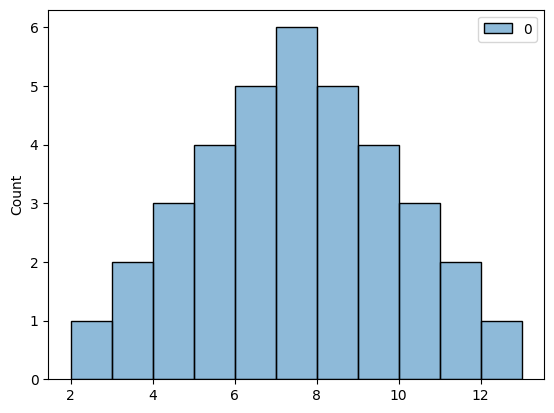

In [32]:
sns.histplot(x_df, bins = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

plt.show() # Here we can show mean = median = mode this is normal skewed

## Random Variables